# **Python Demo Notebook 2**

## Python Example

In [1]:
# Just to show ident issue
for i in range(5):
  print(i)
  print("broken")

0
broken
1
broken
2
broken
3
broken
4
broken


In [2]:
# What does range look like?
print(*range(5))

0 1 2 3 4


In [3]:
# We can add step, and start point
# Notice that it stops before the stop condition
# In this example, we are using a negative step
print(list(range(20,2,-2)))

[20, 18, 16, 14, 12, 10, 8, 6, 4]


In [4]:
def empty_function():
  pass

empty_function()

In [5]:
# Dictionary example
# Can loop a few ways
my_dict = dict()
my_dict['animal'] = "cat"
my_dict['number'] = 5
my_dict['set'] = {3,2,1}

for k, v in my_dict.items():
  print("key is:", k)
  print("value is:", v)
  print("The type of value is",type(v),end="\n\n")


key is: animal
value is: cat
The type of value is <class 'str'>

key is: number
value is: 5
The type of value is <class 'int'>

key is: set
value is: {1, 2, 3}
The type of value is <class 'set'>



## NumPy Example

In [6]:
# Array createion
# Slicing and reshaping
# Matrix algebra
import numpy as np

In [7]:
a1 = np.ones(shape=(5,3))
print(a1)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [8]:
a1 = np.arange(20)
print(a1)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [9]:
a1.sum()

190

In [10]:
a1 = a1.reshape((4,5))
print(a1)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


In [11]:
a1 = a1.reshape((5,4))
print(a1)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]


In [12]:
# Slicing
a1[:3,1:4]  # First 3 rows, col with index 1 through 3 (stop before 4)

array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 9, 10, 11]])

In [13]:
# Pay attention to how these are loaded. Easy to end up with the desired transpose
m1 = np.array([[1,-2],[5,-9]])
m2 = np.array([[-9,2],[-5,1]])
print("m1=\n",m1)
print("\nm2=\n",m2)

m1=
 [[ 1 -2]
 [ 5 -9]]

m2=
 [[-9  2]
 [-5  1]]


In [14]:
np.matmul(m1,m2)

array([[1, 0],
       [0, 1]])

In [15]:
m1@m2   # new syntax

array([[1, 0],
       [0, 1]])

In [16]:
from numpy.linalg import inv
inv(m1)

array([[-9.,  2.],
       [-5.,  1.]])

## Pandas Example

In [17]:
# Read in a CSV file
# Basic manipulation
import pandas as pd

In [18]:
dfInsurance = pd.read_csv("https://raw.githubusercontent.com/willwilson-sdsu/CS550/main/insurance.csv")

In [19]:
dfInsurance

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


In [20]:
dfInsurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       63 non-null     int64  
 1   Y       63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [21]:
dfInsurance.describe()

,X,Y
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


In [22]:
# A way to look for info in data frames with slices
dfInsurance[(dfInsurance['X']>20) & (dfInsurance['Y'] <  70)]

,X,Y
6,23,56.9
13,23,39.6
31,25,69.2


## MatplotLib Example

In [23]:
# Use data from the Pandas example
import matplotlib.pyplot as plt

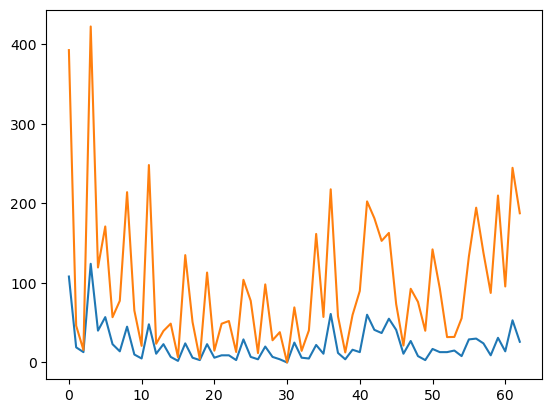

In [24]:
# Line plotting
plt.plot(dfInsurance)

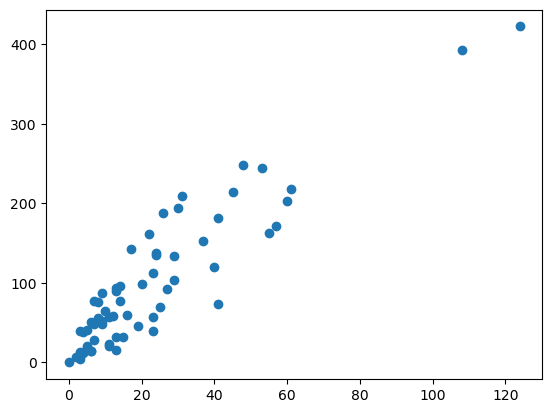

In [25]:
# Look at the relationhsip between X and Y
plt.scatter(dfInsurance["X"],dfInsurance["Y"])

<Axes: >

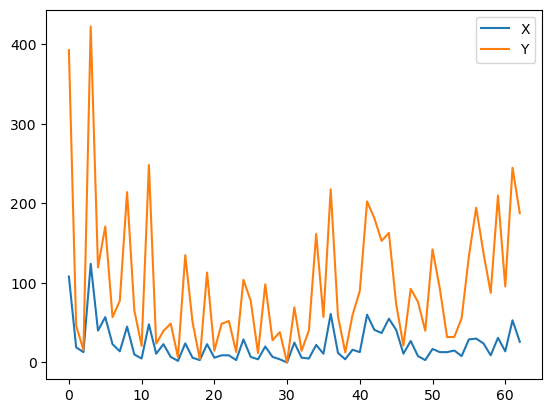

In [26]:
# Can also do some plots right from Pandas
dfInsurance.plot()

<Axes: xlabel='X', ylabel='Y'>

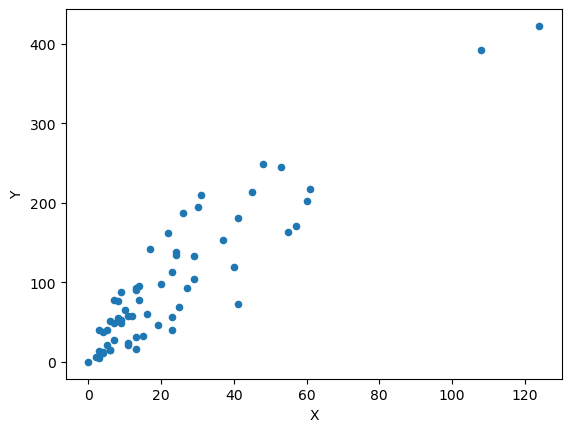

In [27]:
dfInsurance.plot.scatter(x='X',y='Y')

In [28]:
# Use np.random with normal distribution and plot it
mu, sigma = 5, 3    # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

In [29]:
np.mean(s)

4.9949926565275655

In [30]:
abs(mu - np.mean(s))

0.005007343472434478

In [31]:
abs(sigma - np.std(s, ddof=1))

0.012887222917288721

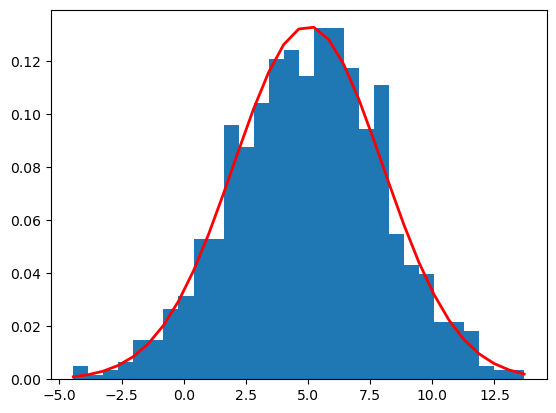

In [32]:
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

## Sk-Learn K-Means Example

In [33]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [34]:
from sklearn.datasets import load_iris
iris= load_iris()

In [35]:
X = iris.data
df = pd.DataFrame(X, columns = iris.feature_names)
df['target'] = iris.target

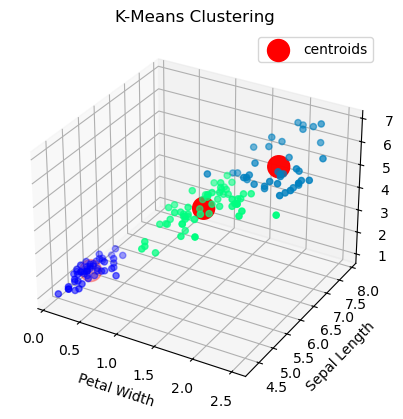

In [36]:
km = KMeans(3)
clusts = km.fit_predict(X)

# Plot the clusters obtained using k-means
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(km.cluster_centers_[:, 3],
            km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 2],
            s = 250,
            marker='o',
            c='red',
            label='centroids')
scatter = ax.scatter(df['petal width (cm)'],df['sepal length (cm)'], df['petal length (cm)'],
                     c=clusts,s=20, cmap='winter')


ax.set_title('K-Means Clustering')
ax.set_xlabel('Petal Width')
ax.set_ylabel('Sepal Length')
ax.set_zlabel('Petal Length')
ax.legend()
plt.show()